# Python refresher: Part II

Last week, we have seen some basic python, which you should be familiar with by now. This includes comments, data types and some of the operators that can be used with them, and other tids and bits.

This week, we're going to look at some slightly more complex topics that are needed to work with the code in the second section of the course. Specifically, some concepts that we need to use Piantadosi's LOTlib3 library.

I expect the topics in this lab will be familiar to different extents to different people. Therefore, rather than explaining everything in huge detail, it's easier if you just ask if you get stuck on a point, and we explore it more in detail.

## Importing and using libraries

### What is a library?

Roughly, a library is a collection of useful stuff. This can include functions / variables / classes / other stuff. For instance, to do maths in python we usually import the 'numpy' library, to do plotting we use 'matplotlib' or 'seaborn', etc. LOTlib3, which we will use in the second half of this course, is one such library.

Using libraries allows us to not rewrite stuff that someone else has already written.

### How do we import and use libraries?

To import a library we write `import` follows by the name of the library, as follows:
```python
import numpy
```

To use the stuff in the library we use the library name followed by a dot followed by the name of what we want from the library. For instance:
```python
numpy.pi
```
to get the number $\pi$.

However, often we do not want to use the full name of the library, but rather some abbreviation. In this case, we can write as follows:
```python
import numpy as np
```

In [64]:
import numpy as np

and then we can just write:
```python
np.pi
```
which is shorter.

In [65]:
np.pi

3.141592653589793

If we do not want the full library but rather just one thing from it, we can write:
```python
from numpy import pi
```
and then we can just use `pi` directly without needing the `np.`. 

In [66]:
from numpy import pi

In [67]:
pi

3.141592653589793

## Functions

### Motivation

Often when programming you repeatedly need some code that 'does the same thing', e.g. multiply two numbers, or take a string and transform it in some way. You can think of a function in python as a way of dealing with this without having to repeatedly write the same code (this is not all that a function is good for, but it is one thing that functions are good for). Basically, you give a name to the 'piece of code' that you repeatedly need, and use the name instead of the code itself.

Let's look at an example to understand this better. Suppose you have to write some code that takes a string, changes the first letter to 'A', and returns the first 10 characters. You can write it as follows:

In [4]:
string = 'hello world'
string = 'A' + string[1:]
string = string[:10]
print(string)

Aello worl


Now suppose that you need to perform the procedure above for each element in a list of strings. You can do this by putting the code above in a loop:

In [5]:
strings = ['hello world', 'conversation world', 'goodbye world']
results = []
for string in strings:
    string = 'A' + string[1:]
    string = string[:10]
    results.append(string)
print(results)

['Aello worl', 'Aonversati', 'Aoodbye wo']


But now suppose that you don't know a priori whether you're getting a list or a single word, and you need to adapt. One natural way to do it would be:

In [6]:
variable = 'bla bla bla'

# check if the variable is a list
if type(variable) is list:
    for string in variable:
        string = 'A' + string[1:]
        string = string[:10]
        results.append(string)
    print(results)
else:
    variable = 'A' + variable[1:]
    variable = variable[:10]
    print(variable)

Ala bla bl


But notes that some lines are repeated, namely
```python
string = 'A' + string[1:]
string = string[:10]
```
We would like a way to only write them once and use them in two places. A natural solution to this is a function that takes a string and performs the transformation we want.

### Standard function definition in python

To define a function in python we do the following:
- start with the keyword `def`
- followed by the name of the function
- followed by an open `(` 
- followed by zero or more arguments divided by commas
- followed by `):`
- followed by one or more lines at the next indentation level 
- In the points where you want a function to return a value, you can optionally put a `return` statement followed by the value you want the function to return.

For instance:
```python
def name(argument1, argument2):
    first line in function
    second line in function
    return value
```

To solve the problem above we could use:

In [8]:
def transform_string(string_to_transform):
    string_to_transform = 'A' + string_to_transform[1:]
    string_to_transform = string_to_transform[:10]
    return string_to_transform

### Calling a function

Then, we can rewrite the above as:

In [9]:
variable = 'bla bla bla'

# check if the variable is a list
if type(variable) is list:
    for string in variable:
        results.append(transform_string(string))
    print(results)
else:
    print(transform_string(string))

Aoodbye wo


Basically what we have done it _called_ a function on a certain input (`transform_string(string)`), which is the same as running the input through the code in the function and getting the return values of the function.

Now we only repeat one word rather than several lines, and also if it turns out we want to change the transformation later, we only need to do it once rather than changing it independently multiple times!

### $\lambda$ ('lambda') functions

At this point it is worth mentioning that there is another notation for defining functions that doesn't use the `def` keyword. Namely, we write `lambda` followed by a space, zero or more comma-separated arguments, a colon, and a single statement.

For example, suppose we want to sum two variables. We could define a function that does it as follows:

In [11]:
sum_function = lambda x, y: x+y

print(sum_function(2, 3))

5


One case where this might be useful is in conjunction with `map`, which is an operation that takes two arguments, a function and a list, and applies the function to each element of the list. E.g., in the following example:

In [17]:
list(map(
    lambda x: x[0]+x[1], 
    [[1,2], [4, 4], [1,3]]
))

[3, 8, 4]

Lambda functions are usually a slightly more advanced topic, but they'll come up a lot in the rest of the course, so it's good to start getting used to them already.

### Recursive functions

This is a slighlty mindbending concept: functions can _call themselves_. This means that inside a function $f$, $f$ itself can be called and the return value can be used inside $f$. Of course, this can easily lead to functions that never terminate, but rather keep calling themselves, forever increasing the level of nested calls. For instance, try to think what is happening here:

In [21]:
def bad_recursive_function(x):
    y = x+1
    bad_recursive_function(y)
    
bad_recursive_function(1)

RecursionError: maximum recursion depth exceeded

Thankfully, python has a way of preventing the function running infinitely and automatically raises an error after a certain number of nested calls. You can see it here as `RecursionError: maximum recursion depth exceeded`.

Usually, recursive functions are conceptualized as follows:
- There is one or more 'base case', i.e. an input for which the function simply calculates a return value without calling the function itself.
- There are 'complex' cases where the input to the function is somehow 'simplified' and the function is called with the simplified input. Eventually after enough 'simplification' steps the input reduces to a base case, and recursion stops.

A classic case of recursion is the following formulation of the $n$th Fibonacci numbers:
- If $n$ is 0 or 1 (i.e., the first or second Fibonacci number), return 1
- If $n$ is greater than 1, return the $n$th-2 Fibonacci number + the $n$th-1 Fibonacci number

In [34]:
def calculate_fibonacci(n):
    # there are two base cases here!
    if n==0 or n==1:
        # in both base cases, just return 1
        return 1
    else:
        # otherwise, follow the recursive rule
        return calculate_fibonacci(n-2) + calculate_fibonacci(n-1)

for i in range(30):
    print(calculate_fibonacci(i), end=',')

1,1,2,3,5,8,13,21,34,55,89,144,233,377,610,987,1597,2584,4181,6765,10946,17711,28657,46368,75025,121393,196418,317811,514229,832040,

There is a lot to say about recursive functions and how they work, but for now try to really understand how the one above works. If you really understand that simple case, other ones are going to be easy.

## Functions as objects

We have refreshed briefly how to define functions above. Functions in python are _first class citizens_, meaning that they can be treated as objects themselves: passed as arguments of functions, destroyed, transformed in all the same ways as other objects. 

Let's see a simple example. Suppose that you have a function $f$ that takes an integer and returns an integer, but you don't know exactly what it does to that integer. But whatever it does, you want another function that does the same thing as $f$ but then adds 3 to the result. 

Well, we can define a function $g$ that takes a function $f$ _as an argument_ and returns another function from integer to integer, that first calls $f$ on the integer and then adds three:

In [52]:
def modify_f(func):
    # define a function that runs func and then adds 3
    def g(n):
        return func(n) + 3
    # return that function
    return g

Let's see `modify_f` in action:

In [54]:
# define an f that take an int and returns an int
# (namely, the argument multiplied by two)
f = lambda x: x * 2

# get a modified function by running
# g through modify_f
modified_f = modify_f(f)

# call the modified function
# on an example
modified_f(4)

11

The point of this example is that `modify_f` takes _a function_ as an input and return _a function_ as an output. You can use manipulate functions like that!

## Recursion without recursion (note: more difficult!)

(For more explanation on the material in this section, see [this page](https://www.lambdacircle.com/the-y-and-z-combinators-in-python/))

Note that things become complicated easily when we work with functions that take other functions as inputs. In those cases, you can define functions that _take themselves_ (as well as other arguments). This actually allows us to do surprising things, like have the same power as recursion without using recursion directly, i.e., without calling a function in its own definition.

For instance, consider the following function, which as you can see is not strictly speaking recursive:

In [43]:
def strange_fibonacci(f):
    # takes a function f and
    # defines a new function 
    # whose behaviour depends on
    # the input function f
    def g(n):
        if n == 0 or n == 1:
            return 1
        else:
            return f(f)(n-1) + f(f)(n-2)
    return g

And now consider the following function which in a way encodes the recursion bit (but without being explicitly recursive: it's not calling itself in its own definition):

In [44]:
# takes a function, calls the function on itself
recursive_function = lambda f: f(f)

What `recursive_function` does is call a function on itself.

When called with `strange_fibonacci` as an argument, it will effectively calculate `strange_fibonaccy(strange_fibonacci)`, and this will return the following function:
```python
def g(n):
        if n == 0 or n == 1:
            return 1
        else:
            return (
                strange_fibonacci(strange_fibonacci)(n-1) + 
                strange_fibonacci(strange_fibonacci)(n-2)
            )
```
which, when called with a specific integer, will define new `g`s and call them in a nested way.

Let's test it with a specific number:

In [46]:
recursive_function(strange_fibonacci)(10)

89

Can you figure out _exactly_ what is happening here? It's a bit mindbending.

We can also get rid of the `f(f)` inside `strange_fibonacci`, since it still kind of feels like a type of recursion. To do that, we define the following function:

In [55]:
apply_inside = lambda f: lambda g: f(lambda y: g(g)(y))

How does `apply_inside` work?

- You pass it some function $f$ ($f$ takes a function as argument), and it returns another function, let's call it $h$.
- $h$ (i.e., the return value of `apply_inside`) is defined as `lambda g: f(lambda y: g(g)(y)`, and so it is a function:
    - from a function $g$ 
    - to the result of calling $f$ (the original argument) on `lambda y: g(g)(y)`

This might become clearer with an example. Let's define another version of our strange fibonacci function, this time without the `f(f)` bit:

In [59]:
def strange_fibonacci(f):
    # takes a function f and
    # defines a new function 
    # whose behaviour depends on
    # the input function f
    def g(n):
        if n == 0 or n == 1:
            return 1
        else:
            return f(n-1) + f(n-2)
    return g

Now consider `apply_inside(strange_fibonacci)`. How does it work? Well, we know from the definition of `apply_inside` that it will have value:

`apply_inside(strange_fibonacci)` = `lambda g: strange_fibonacci(lambda y: g(g)(y))`

Note that now the argument of `strange_fibonacci` is `lambda y: g(g)(y)`, which is a function from a number to a function applied to itself and then to the number. Within `strange_fibonacci`, the input function appears in the line `return f(n-1) + f(n-2)`, which becomes:
- `return (lambda y: g(g)(y))(n-1) + (lambda y: g(g)(y))(n-2)`

and therefore:
- `return g(g)(n-1) + g(g)(n-2)`

And this is just a version of the `f(f)` bit we had at the beginning, which we have now successfully isolated into its own function (apply inside)!

Let's make sure this works:

In [60]:
recursive_function(apply_inside(strange_fibonacci))(10)

89

This section was a bit mental gymnastics to give you an idea of how messy things can get when higher-order functions are involved (i.e., function that take functions as arguments). We will see a lot of higher-order functions in the rest of the semester, so try to become comfortable with them!

## Plotting in Matplotlib

Since we'll be want to plot things in the second half of the course, it makes sense to introduce some simple cases now. We'll be using the most popular plotting library for python, `matplotlib`. We usually import it as follows:

In [62]:
import matplotlib.pyplot as plt

Usually, we'll initialize a new plot with the following line:
```python
fig, axes = plt.subplots()
```
What `plt.subplots()` does is create a new figure object and a new `axes` object. The figure object is the whole figure, which can contain one or more axes. If you are unfamiliar with the `plt.subplots` interface, have a look [here](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.subplots.html). 

The axes are objects that have a bunch of methods, corresponding e.g. to different types of plots that can be called on them. Let's see an example of the `scatter` method of axes, which is used to make scatter plots:

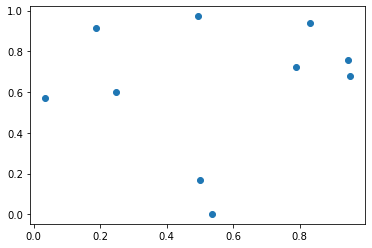

In [71]:
fig, axes = plt.subplots()

# create some new data to plot
# don't worry too much if you don't understand this line
x_scatter, y_scatter = np.random.rand(2,10)

# create a scatterplot with the given
# x and y coordinates
axes.scatter(x_scatter, y_scatter)

# show the plot
plt.show()

Another important function is to draw line plots, called simply `plot`:

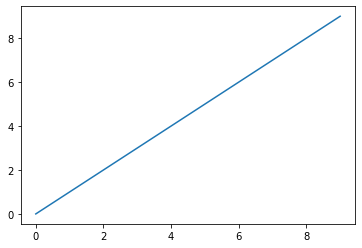

In [73]:
fig, axes = plt.subplots()

# create some new data to plot
# don't worry too much if you don't understand this line
x_line = y_line = np.arange(10)

# create a line plot with the given
# x and y coordinates
axes.plot(x_line, y_line)

# show the plot
plt.show()

Since we will be dealing with discrete variables a lot, it will be useful to also draw barplot, with the method `bar`:

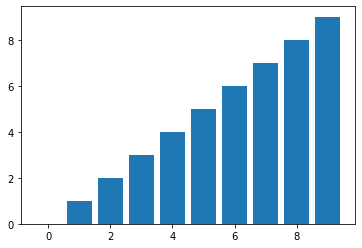

In [75]:
fig, axes = plt.subplots()

# create some new data to plot
# don't worry too much if you don't understand this line
x_bar = y_bar = np.arange(10)

# create a bar plot with the given
# x and height values
axes.bar(x_bar, y_bar)

# show the plot
plt.show()

We will also need to know what we are plotting, so we need to change the labels on the x-axis:

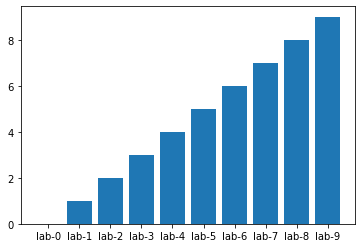

In [77]:
fig, axes = plt.subplots()

# create some new data to plot
# don't worry too much if you don't understand this line
x_bar = y_bar = np.arange(10)

# create a bar plot with the given
# x and height values
axes.bar(x_bar, y_bar)

# define some labels for each x value
# don't worry if you don't understand this line
x_tick_labels = [f'lab-{x}' for x in range(len(x_bar))]

# tell plt that we'll specify one tick for each bar
axes.set_xticks(range(len(x_bar)))

# set the tick labels
axes.set_xticklabels(x_tick_labels)

# show the plot
plt.show()

## Classes, what's the idea?

We talked above about how we use functions because we don't want to rewrite the same stuff over and over again. But suppose that you don't want to just repeat a function, but a whole collection of functions and properties that can depend on each other. Then, you could define a class. In this light, a class is a _template for an object_, where an object has specific values for those variables that you left unspecified in the class.

Let's consider an example to make the explanation above clearer (as it often happens, the definitions are interdependent and the best way is to see how the terms are used in practice). Suppose we want to write a program that models students at a university. A very natural way of structuring this program is to have variables that correspond to students, e.g., one variable called `mark` for Mark, etc. 

What type should these variables be? Clearly they're not integers, or strings, or floats. Ideally we'd want to have a _student_ type with its own methods that we can freely define. In other words, we want to have a `Student` class (Note: class names always start with a capital letter in pyhon by convention), which can produce specific `student` objects (`mark`, etc.). Here's how we can define it in python:

In [101]:
# a class is defined with the keyword 'class'
# followed by the name of the class 
# (remember: first letter capitalized!)
class Student:
    
    # __init__ is a special function
    # that gets called when a new object
    # is created from the class.
    # 'self' contains the properties
    # and methods defined in the class itself
    # and is passed to every function in the class
    def __init__(self, name, age):
        # define some class attributed
        # to store data about the student
        self.name = name
        self.age = age
        self.grades = []
        
    # define a new function that we can 
    # use to record new grades that a student got.
    # This function takes a grade and
    # adds it to the student's record.
    def add_grade(self, grade):
        # The grades record is a list.
        # Append the new grade to the list!
        self.grades.append(grade)
        
    def average_grade(self):
        # Calculate the average of the grades
        # recorded in the grades list
        # and return the resulting mean.
        return np.mean(self.grades)

Now we can see the notation for instantiating a specific object (in this case, a student called 'Mark') from a class:

In [100]:
# an object is defined by calling 
# the class name with the arguments
# defined in the __init__ function
mark = Student('mark', 22)

# add some grade to Mark
mark.add_grade(1.3)
mark.add_grade(1.0)

# print Mark's average grade
print(mark.average_grade())

1.15


You don't need to understand everything about classes, and you won't have to define one from scratch, but we'll have to adapt them as part of working with Piantadosi's LOTlib3 library. If you want to read more about classes in python [here is the documentation](https://docs.python.org/3/tutorial/classes.html) and here is [another explanation of the basic idea](https://towardsdatascience.com/introduction-to-python-classes-da526ff745df). 

## Error handling

As you have already seen above, if something goes wrong sometimes python raises an _error_. For instance, above we have encountered `RecursionError: maximum recursion depth exceeded`. However, there are other types of errors in python, for instance if you try to get an element from an index that's too high for a list:

In [102]:
a = [1, 3, 4]
print(a[3])

IndexError: list index out of range

In general, errors help us understand what went wrong with our code. However, in python they can also be used as part of the program flow. Specifically, we might predict a situation that causes a specific error and write in the code what we want to happen is such a situation occurs. Here's how we do it:

In [106]:
a = [1, 2, 4, 5]

# warn python that the indented code
# might contain an error
try:
    for i in range(10):
        print(a[i], end=', ')
# tell python what to do in case
# a specific kind of error occurs
# In this case, an IndexError
except IndexError:
    print('Finished: There are fewer than 10 elements in the list!')

1, 2, 4, 5, Finished: There are fewer than 10 elements in the list!


Here's another error you should be familiar with (it will come up again later in the course!)

In [107]:
1/0

ZeroDivisionError: division by zero

And how we can deal with it:

In [108]:
a = 0

try:
    print(5 / a)
except ZeroDivisionError:
    print('undefined')

undefined


# First homeworks set

- Write a function to sum three numbers.
- Write a $\lambda$ function to sum three numbers.
- Write a recursive function that calculates the factorial function for $n$, written $n!$, and defined as follows:

\begin{align}
    1! &= 1 \\
    n! &= n \times (n-1)!
\end{align}

- Write a recursive function `interpret` that takes a string that consists of a series of `¬` followed by a single `a` (`a`, `¬a`, `¬¬a`, `¬¬¬a`, etc) and is defined as follows:

\begin{align}
    \text{interpret}(x) &= 1                             & \text{if } x = \text{'a'} \\
                        &= 1 - \text{interpret(x[1:])}   & \text{else}
\end{align}
    (do you see how this corresponds to the semantics of Boolean negation?)

- Rewrite the factorial function and `interpret` using `recursive_function` and `apply_inside` rather than explicit recursion.
- Make a scatterplot of the first 10 strings interpreted by `interpret`  (`a`, `¬a`, `¬¬a`, `¬¬¬a`, etc): the x-axis shows the strings in order and the y-axis shows the result of `interpret` for the corresponding string.
- Define a `Teacher` class that contains a record of the students that the teacher taught to, as well as the average grade the teacher gave to all the students.
- Google how to read a text file and print out its content. Write code that does this, but using the `try ... except ...` statements prints 'File does not exist!' if the file does not exist.